# 생선 무게 예측 인공지능

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 데이터 준비

In [2]:
import numpy as np

In [3]:
flat_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
flat_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

## 산점도

In [4]:
import matplotlib.pyplot as plt

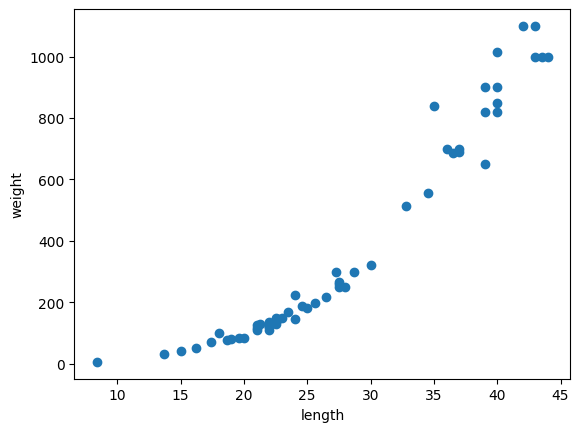

In [5]:
plt.scatter(flat_length, flat_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 훈련 세트와 테스트 세트 준비

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_input, test_input, train_target, test_target = train_test_split(flat_length, flat_weight, random_state=42, test_size=0.25)

In [8]:
print(train_input.shape, test_input.shape) # 현재 1차원 배열, 사이킷런에 사용할 데이터는 2차원 배열이어야 함. reshape(a,b) 메서드를 통해 axb 크기로 변경

(42,) (14,)


### 2차원 배열 변경

In [9]:
train_input = train_input.reshape(-1, 1) # reshape(-1,1)은 크기에 -1 지정하면 나머지 원소 개수로 모두 채우라는 의미
test_input = test_input.reshape(-1, 1)

In [10]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 회귀 모델 생성

In [11]:
from sklearn.neighbors import KNeighborsRegressor # K-최근접 이웃 회귀 알고리즘을 구현한 클래스
knr = KNeighborsRegressor()

### 모델 훈련

In [12]:
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor()

### 모델 평가

In [13]:
knr.score(test_input, test_target) # 회귀에서는 이 점수를 결정계수라고 함

0.992809406101064

## 과대적합 vs 과소적합

In [14]:
print(knr.score(train_input, train_target)) # 훈련 세트의 결정계수 확인

0.9698823289099254


In [15]:
# 과소적합 문제를 해결하기 위해 이웃의 개수를 3으로 설정한다.
knr.n_neighbors = 3
# 모델을 다시 훈련한다.
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [16]:
print(knr.score(test_input, test_target))

0.9746459963987609


###새로운 데이터로 예측된 결과

In [17]:
knr.predict([[200]])

array([1033.33333333])

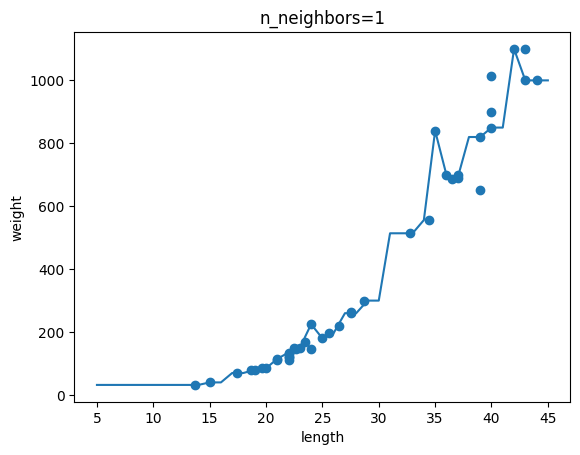

훈련데이터: 0.9852830341215901
테스트데이터: 0.991309195814175


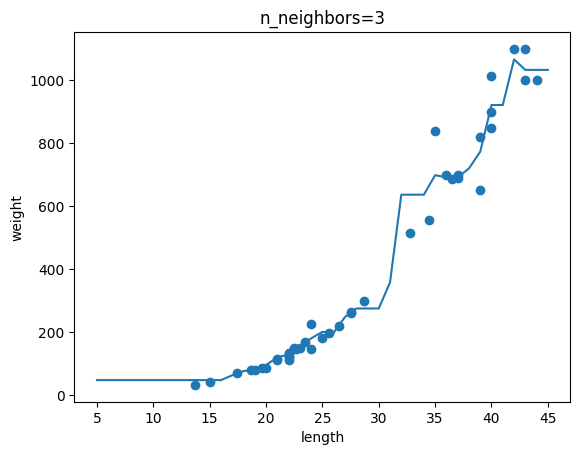

훈련데이터: 0.9804899950518966
테스트데이터: 0.9746459963987609


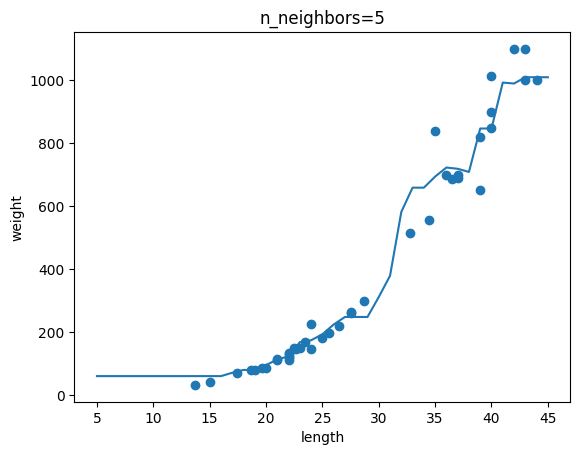

훈련데이터: 0.9698823289099254
테스트데이터: 0.992809406101064


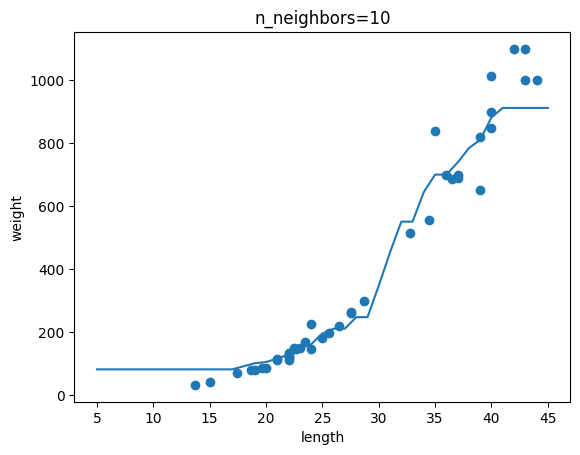

훈련데이터: 0.96164569026043
테스트데이터: 0.9737908255822255


In [23]:
knr = KNeighborsRegressor()
x = np.arange(5, 46).reshape(-1, 1)

for n in [1, 3, 5, 10]: # 가장 적합한 값인 3을 리스트에 추가하였음.
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)
    plt.scatter(train_input, train_target)  # 실제값
    plt.plot(x, prediction)  # 예측값(길이가 5~45cm일때 무게를 예측한 값)
    plt.title('n_neighbors={}'.format(n)) # 그래프 제목
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()
    print('훈련데이터:', knr.score(train_input, train_target))
    print("테스트데이터:", knr.score(test_input, test_target))